### Solar Wind Interactions with Satellite Orbit

This notebook is designed to show the effects of solar wind on an orbiting satellite as described in Project 5.17 of *Introduction to Computer Simulation Methods by Wolfgang Christian* Project 5.17

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import ode
import matplotlib

In [33]:
from IPython.display import display, Markdown, Latex

In [34]:
%matplotlib notebook

## Background of Project

This project begins with a satellite orbiting earth, and a uniform solar wind coming from the horizontal direction.
The satellite's equations of motion are given to us as:

$$ \frac{d^2x}{dt^2} = -\frac{GMx}{r^3}+W$$

$$ \frac{d^2y}{dt^2} = -\frac{GMy}{r^3}$$

With W being euqal to the force produced by the solar wind divided by the mass of the satellite.

The satellite in question will have the following initial parameters:
- $m = 1600kg$
- Altitude = $2000km$
- Orbit will be in the counterclockwise direction.

In [35]:
def orbit(dep, t):
    """ Calculate and return the derivative [d/dt, d^2/dt^2] evaluated as a function of y, dy/dt, and t
    where y is the dependent variable.
    
    Keyword arguments:
    t -- time at the beginning of the time step
    dep -- an array of the dependent variable and its derivative [y, dy/dt]_n at time t
    """    

    x = dep[0]
    y = dep[1]
    vx = dep[2]
    vy = dep[3]
    r = np.sqrt(x**2 + y**2)
    #print(x, vx, "X")
    #print(y, vy, "Y")
    #print(vx, vy, "vx, vy")
    
    
    deriv = np.zeros(4) #shape must correspond to y
    deriv[0] = vx # dx/dt = vx
    deriv[1] = vy
    deriv[2] = -(G*M*x)/r**3 + W
    deriv[3] = -(G*M*y)/r**3
    
    return deriv

The *orbit* function above, along with the *ode.py* file in this folder, serves to solve the equations of motion and update the x and y positions and velocities incrementally. The ODE solution method used in this notebook is the RK2 method.

In [36]:
G = 6.67E-11 #Gravitational Constant
M = 5.97E24 #Mass of Earth in kg
m = 1600 #Mass of typical satellite in Low Earth Orbit
r_e = 6.371e6 #Radius of Earth in m
o_h = 2000000 #Low Earth Orbit Alititude in m
ri = r_e+o_h
v = np.sqrt((G*M)/ri) #speed for a circular orbit at any given 
w = 0 #Solar Wind Strength Coeefficient
W = w*(G*M)/(ri**2) #Strength of 
print(v)

6897.018827973095


The initial parameters given above would allow the orbiting satellite to have a stable circular low earth orbit.

The value of $W$ is made a portion of the inital acceleration due to gravity, as described in the book project.

## Making and confirming circular orbit

The cell below contains the setup needed to create a time evolution loop for this system.

In [49]:
#initial dependent variables
x0 = (1/np.sqrt(2))*ri
vx0 = (1/np.sqrt(2))*v
y0 = -(1/np.sqrt(2))*ri
vy0 = (1/np.sqrt(2))*v
vtot0 = np.sqrt(vx0**2 + vy0**2)

data = np.array([x0, y0, vx0, vy0]) #initialize array to store dependent variables

#independent variable
t = 0
h = 1 #Size of timestep
Nsteps = 10000 #N loops of h seconds for full time evolution evolution

#Arrays needed for various plots below.
xarr = np.zeros(Nsteps)
vxarr = np.zeros(Nsteps)
yarr = np.zeros(Nsteps)
vyarr = np.zeros(Nsteps)
rarr = np.zeros(Nsteps)
tarr = np.zeros(Nsteps)
vtotarr = np.zeros(Nsteps)
thetaarr = np.zeros(Nsteps)
#Inital array values
tarr[0] = t
xarr[0] = x0
vxarr[0] = vx0
yarr[0] = y0
vyarr[0] = vy0
rarr[0] = ri
vtotarr[0] = vtot0
thetaarr[0] = 1/(np.tan(y0/x0))
#####
w = 0 #Solar Wind Strength
W = w*(G*M)/(ri**2)

In [50]:
print(thetaarr[0])
print(vtotarr[0], rarr[0])

-0.6420926159343306
6897.018827973095 8371000.0


The cell below contains the 

In [51]:
#Time evolution loop
for n in range(0, Nsteps-1):
    data = ode.RK2(orbit, data, t, h) #Brings ODE in orbit function into the RK2 ODE Solver

    t = t + h
    
    tarr[n+1] = t
    rarr[n+1] = np.sqrt(data[0]**2 + data[1]**2)
    if(rarr[n+1]<r_e):
        break
    else:
        xarr[n+1] = data[0]
        yarr[n+1] = data[1]
        vxarr[n+1] = data[2]
        vyarr[n+1] = data[3]
        vtotarr[n+1] = np.sqrt(data[2]**2 + data[3]**2)
        thetaarr[n+1] = 1/np.tan(data[1]/data[0])


In [52]:
print(vyarr[0],vxarr[0], vtotarr[0])

4876.928783231069 4876.928783231069 6897.018827973095


<IPython.core.display.Javascript object>


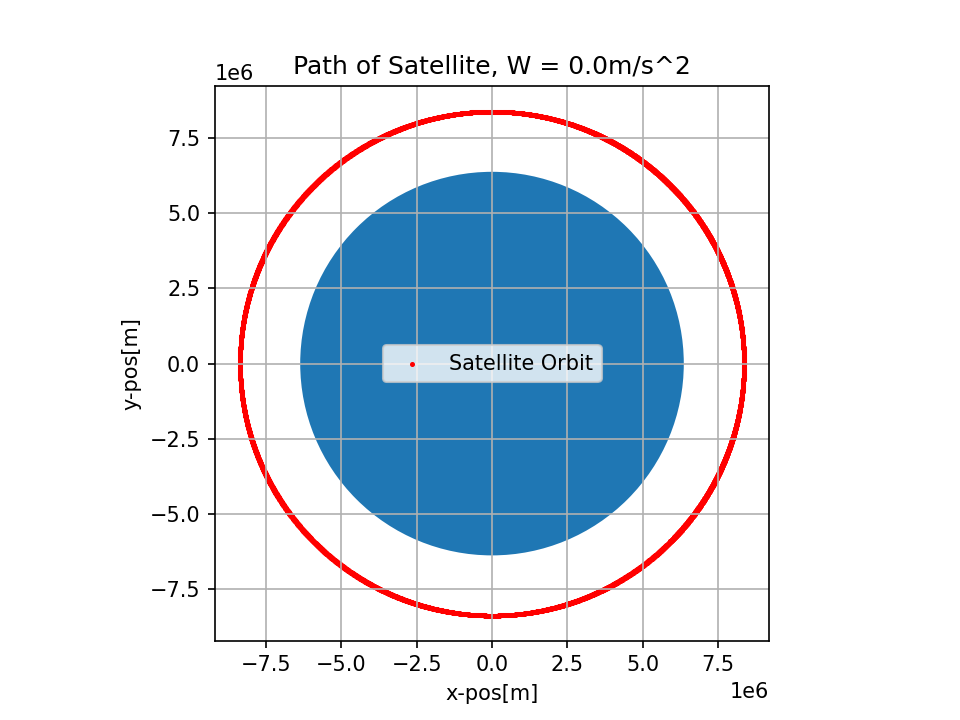

In [53]:
plt.figure()
###Setting aspect ratio to 1 and adding in a circle for Earth###
ax = plt.gca()
ax.set_aspect(1.0)
draw_circle = plt.Circle((0, 0), r_e)
ax.add_artist(draw_circle)

plt.title("Path of Satellite, W = "+str(np.around(W, 2))+"m/s^2")
plt.xlabel("x-pos[m]")
plt.ylabel("y-pos[m]")
plt.scatter(xarr, yarr, s=2, color = "red", label = "Satellite Orbit")

plt.grid()
plt.legend()
plt.show()

There are several ways in which this orbit can be determined as stable. The first of which is simply looking at the position plot above. As we can see, there are no noticebale deviations in the shape of the orbit.

Below is the same method as above, but framed in a way more suitable to circular orbits: A graph of altitude over time.
As we can see, the altitude of the satellite stays constant throughout the 10,000s of observation.

<IPython.core.display.Javascript object>


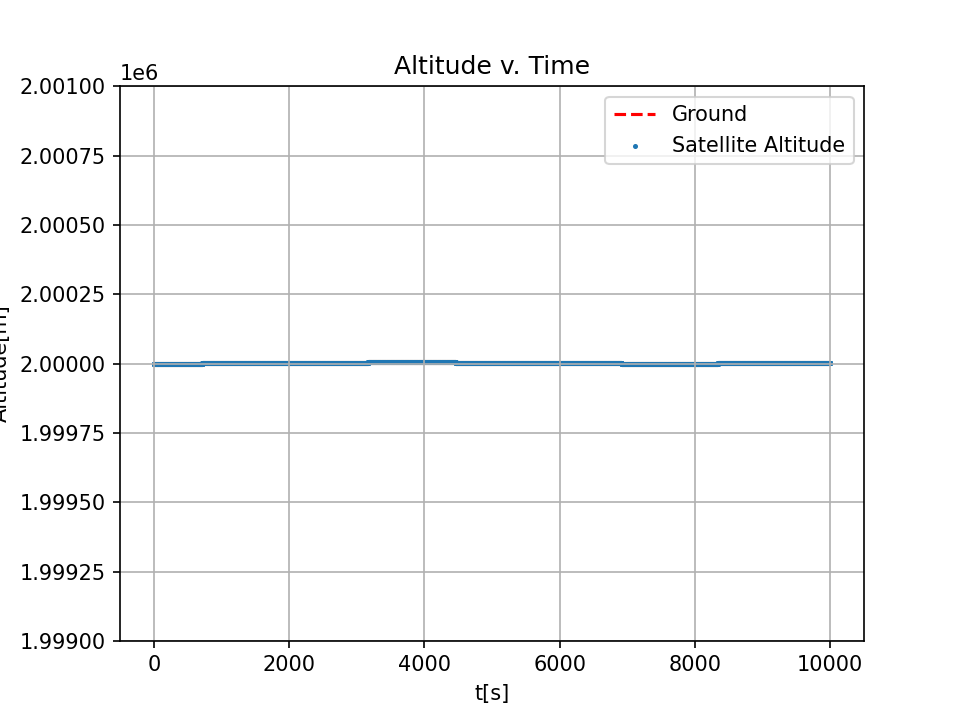

In [55]:
plt.figure()
plt.title("Altitude v. Time")
plt.xlabel("t[s]")
plt.ylabel("Altitude[m]")
plt.ylim(1.999e6, 2.001e6)
plt.scatter(tarr, (rarr-r_e), s = 2, label = "Satellite Altitude")
plt.axhline(0, linestyle = "--", color = "red", label = "Ground")
plt.grid()
plt.legend()

Below is the third method of determining if an orbit is stable: Tracking the total energy of the satellite (Both Potential and Kinetic) over time. If the total energy stays constant, then the system is in a stable equilibrium. While the total energy appears to change in the graph below, it only changes by ~$20J$, which is essentially zero compared to the ~$10^{10}$ value of the total energy.

<IPython.core.display.Javascript object>


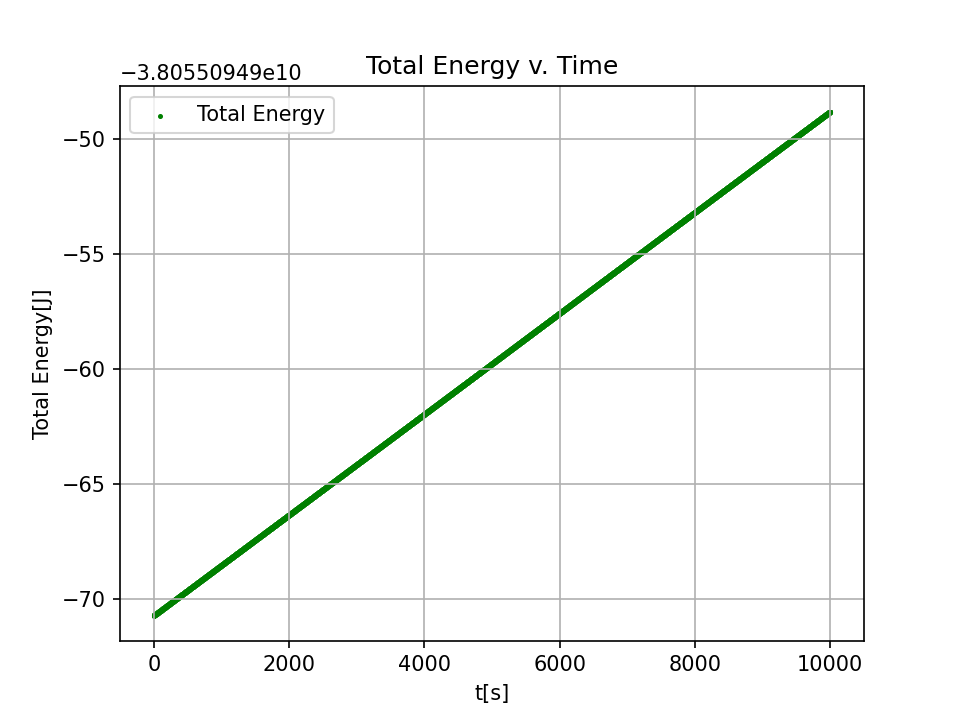

In [41]:
vr = vtotarr*np.cos(thetaarr)
vt = vtotarr*np.sin(thetaarr)
ke = .5*m*(vt**2 + vr**2)

found = np.where(rarr != 0)

pe = -(G*M*m)/rarr[found]
plt.figure()
plt.title("Total Energy v. Time")
plt.scatter(tarr, ke+pe, s = 2, color = "green", label = "Total Energy")
plt.xlabel("t[s]")
plt.ylabel("Total Energy[J]")
plt.grid()
plt.legend()

## Adding Effects of Solar Wind

Now that a circular orbit has been made, a small solar wind will be applied in order to observe how much the sattelite's orbit will change both in position-space and velocity-space.

In [56]:
#initial dependent variables
x0 = -(1/np.sqrt(2))*ri
vx0 = (1/np.sqrt(2))*v
y0 = -(1/np.sqrt(2))*ri
vy0 = -(1/np.sqrt(2))*v
vtot0 = np.sqrt(vx0**2 + vy0**2)

data = np.array([x0, y0, vx0, vy0]) #initialize array to store dependent variables

#independent variable
t = 0
h = 1 #Size of timestep
Nsteps = 10000 #N loops of h seconds for full time evolution evolution

#Arrays needed for various plots below.
xarr = np.zeros(Nsteps)
vxarr = np.zeros(Nsteps)
yarr = np.zeros(Nsteps)
vyarr = np.zeros(Nsteps)
rarr = np.zeros(Nsteps)
tarr = np.zeros(Nsteps)
vtotarr = np.zeros(Nsteps)
thetaarr = np.zeros(Nsteps)
#Inital array values
tarr[0] = t
xarr[0] = x0
vxarr[0] = vx0
yarr[0] = y0
vyarr[0] = vy0
rarr[0] = ri
vtotarr[0] = vtot0
thetaarr[0] = 1/(np.tan(y0/x0))
#####
w = 0.03 #Solar Wind Strength
W = w*(G*M)/(ri**2)

In [57]:
#Time evolution loop
for n in range(0, Nsteps-1):
    data = ode.RK2(orbit, data, t, h) #Brings ODE in orbit function into the RK2 ODE Solver

    t = t + h
    
    tarr[n+1] = t
    rarr[n+1] = np.sqrt(data[0]**2 + data[1]**2)
    if(rarr[n+1]<r_e):
        break
    else:
        xarr[n+1] = data[0]
        yarr[n+1] = data[1]
        vxarr[n+1] = data[2]
        vyarr[n+1] = data[3]
        vtotarr[n+1] = np.sqrt(data[2]**2 + data[3]**2)
        thetaarr[n+1] = 1/np.tan(data[1]/data[0])


<IPython.core.display.Javascript object>


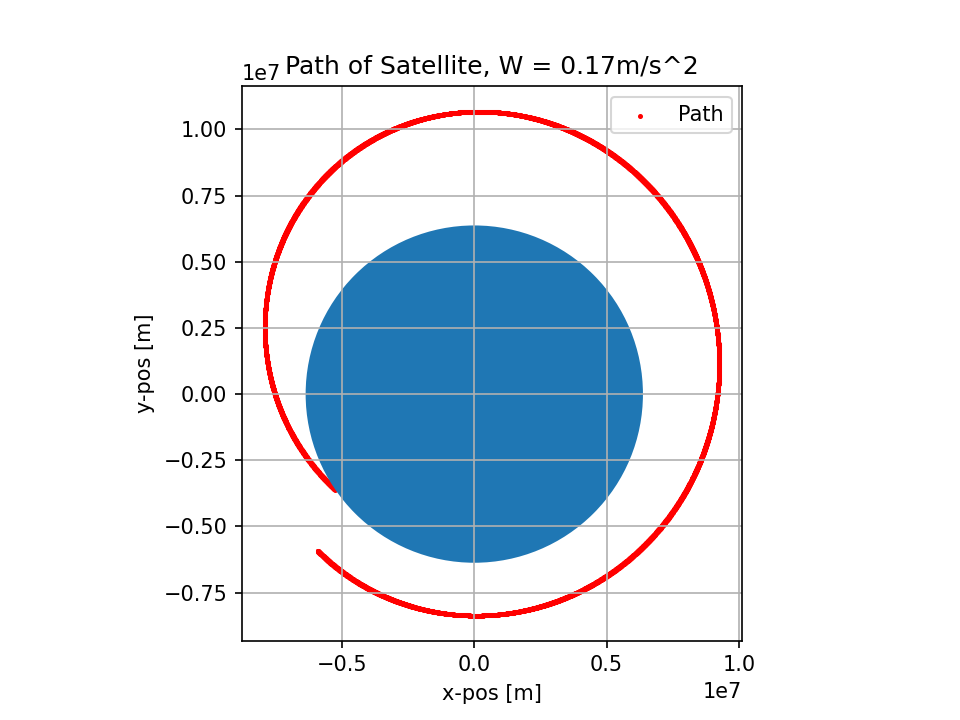

In [58]:
plt.figure()
###Setting aspect ratio to 1 and adding in a circle for Earth###
#plt.xlim(-1.5e7, 1.5e7)
#plt.ylim(-1.5e7, 1.5e7)
ax = plt.gca()
ax.set_aspect(1.0)
draw_circle = plt.Circle((0, 0), r_e)

plt.title("Path of Satellite, W = "+str(np.around(W, 2))+"m/s^2")
plt.xlabel("x-pos [m]")
plt.ylabel("y-pos [m]")
plt.scatter(xarr, yarr, s=2, color = "red", label = "Path")
ax.add_artist(draw_circle)


plt.grid()
plt.legend()
plt.show()

Oh no! The satellite crashed! Let's take a look at its altitude v. time graph as well as its total energy graph.

The altitude graph lines up with what we see in the position graph. As time goes on, the force imparted by the solar wind brings the apogee of the orbit up quite significantly, but the perigee of the orbit ends up being inside of Earth, causing a crash.

<IPython.core.display.Javascript object>


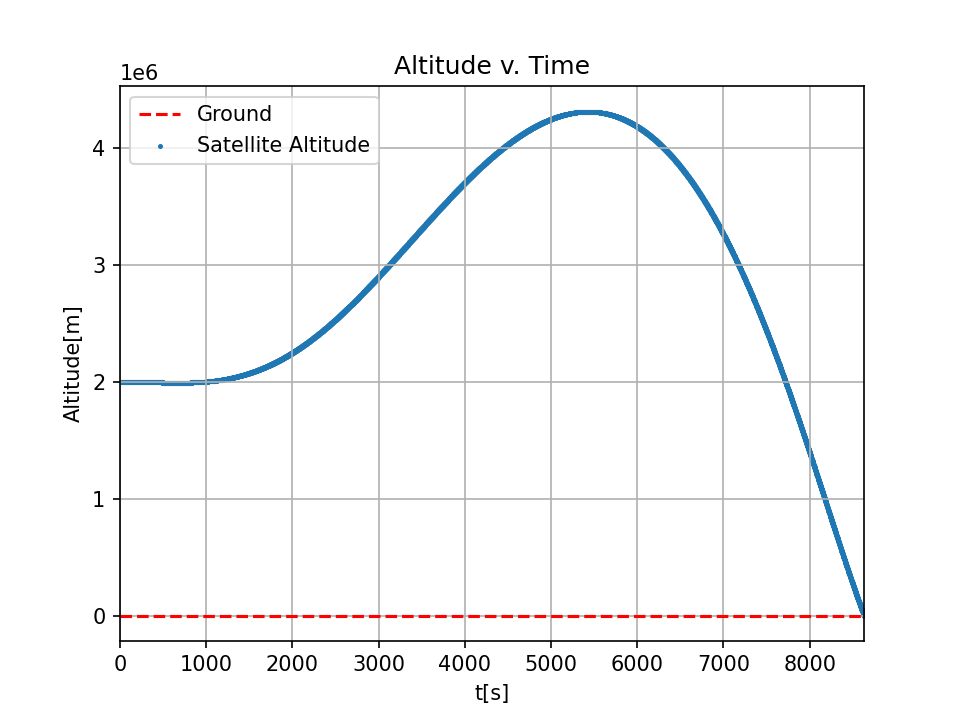

In [59]:
plt.figure()
found = np.where(rarr != 0)
plt.title("Altitude v. Time")
plt.xlabel("t[s]")
plt.ylabel("Altitude[m]")
plt.xlim(0,max(tarr[found]))
#plt.ylim(-5e4, 5e6)
plt.scatter(tarr[found], (rarr[found]-r_e), s = 2, label = "Satellite Altitude")
plt.axhline(0, linestyle = "--", color = "red", label = "Ground")
plt.grid()
plt.legend()

The Total Energy graph for this system below is quite different than the solar windless system.
There is a significant change in the total energy of the system throughout the ~8700$s$ flight time. With this graph alone we can determine that this system is highly unstable.

<IPython.core.display.Javascript object>


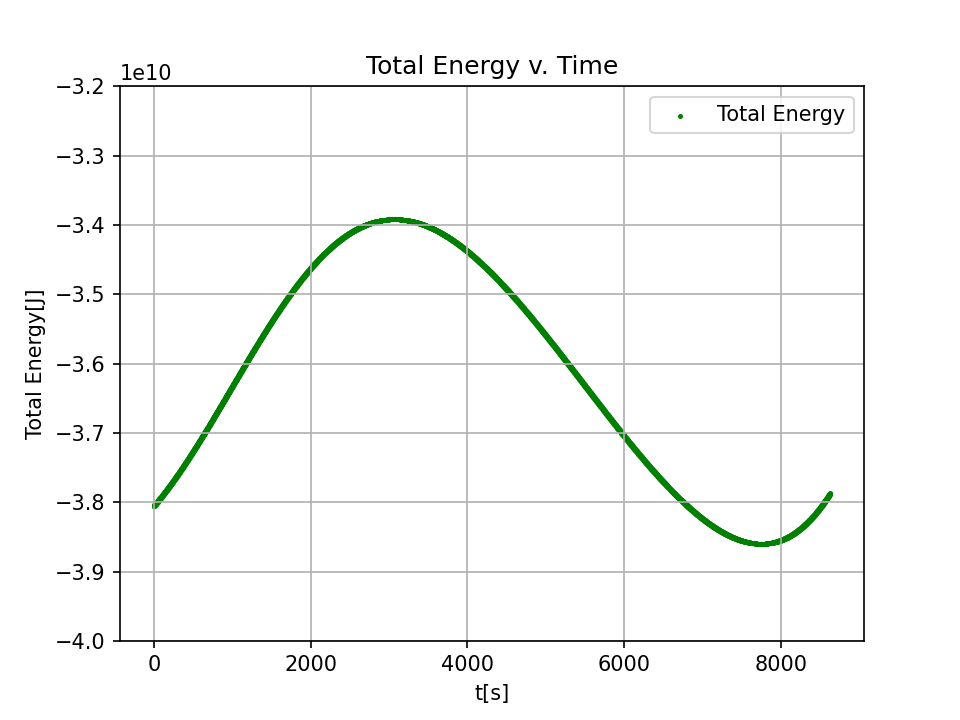

In [60]:
vr = vtotarr*np.cos(thetaarr)
vt = vtotarr*np.sin(thetaarr)
ke = .5*m*(vt**2 + vr**2)

found = np.where(rarr != 0)

ke = .5*m*(vt[found]**2 + vr[found]**2)
pe = -(G*M*m)/rarr[found]
plt.figure()
plt.title("Total Energy v. Time")
plt.ylim(-4e10, -3.2e10)
plt.scatter(tarr[found], ke+pe, s = 2, color = "green", label = "Total Energy")
plt.xlabel("t[s]")
plt.ylabel("Total Energy[J]")
plt.grid()
plt.legend()

## Deorbiting a satellite in another way

Let's repeat the same steps that we just did, but with a solar wind that applies a signifcant amount of force compared to the gravitational force produced by the Earth; in this case 10%.

In [67]:
#initial dependent variables
x0 = -(1/np.sqrt(2))*ri
vx0 = (1/np.sqrt(2))*v
y0 = -(1/np.sqrt(2))*ri
vy0 = -(1/np.sqrt(2))*v
vtot0 = np.sqrt(vx0**2 + vy0**2)

data = np.array([x0, y0, vx0, vy0]) #initialize array to store dependent variables

#independent variable
t = 0
h = 1 #Size of timestep
Nsteps = 10000 #N loops of h seconds for full time evolution evolution

#Arrays needed for various plots below.
xarr = np.zeros(Nsteps)
vxarr = np.zeros(Nsteps)
yarr = np.zeros(Nsteps)
vyarr = np.zeros(Nsteps)
rarr = np.zeros(Nsteps)
tarr = np.zeros(Nsteps)
vtotarr = np.zeros(Nsteps)
thetaarr = np.zeros(Nsteps)
#Inital array values
tarr[0] = t
xarr[0] = x0
vxarr[0] = vx0
yarr[0] = y0
vyarr[0] = vy0
rarr[0] = ri
vtotarr[0] = vtot0
thetaarr[0] = 1/(np.tan(y0/x0))
#####
w = 0.1 #Solar Wind Strength
W = w*(G*M)/(ri**2)

In [68]:
#Time evolution loop
for n in range(0, Nsteps-1):
    data = ode.RK2(orbit, data, t, h) #Brings ODE in orbit function into the RK2 ODE Solver

    t = t + h
    
    tarr[n+1] = t
    rarr[n+1] = np.sqrt(data[0]**2 + data[1]**2)
    if(rarr[n+1]<r_e):
        break
    else:
        xarr[n+1] = data[0]
        yarr[n+1] = data[1]
        vxarr[n+1] = data[2]
        vyarr[n+1] = data[3]
        vtotarr[n+1] = np.sqrt(data[2]**2 + data[3]**2)
        thetaarr[n+1] = 1/np.tan(data[1]/data[0])


<IPython.core.display.Javascript object>


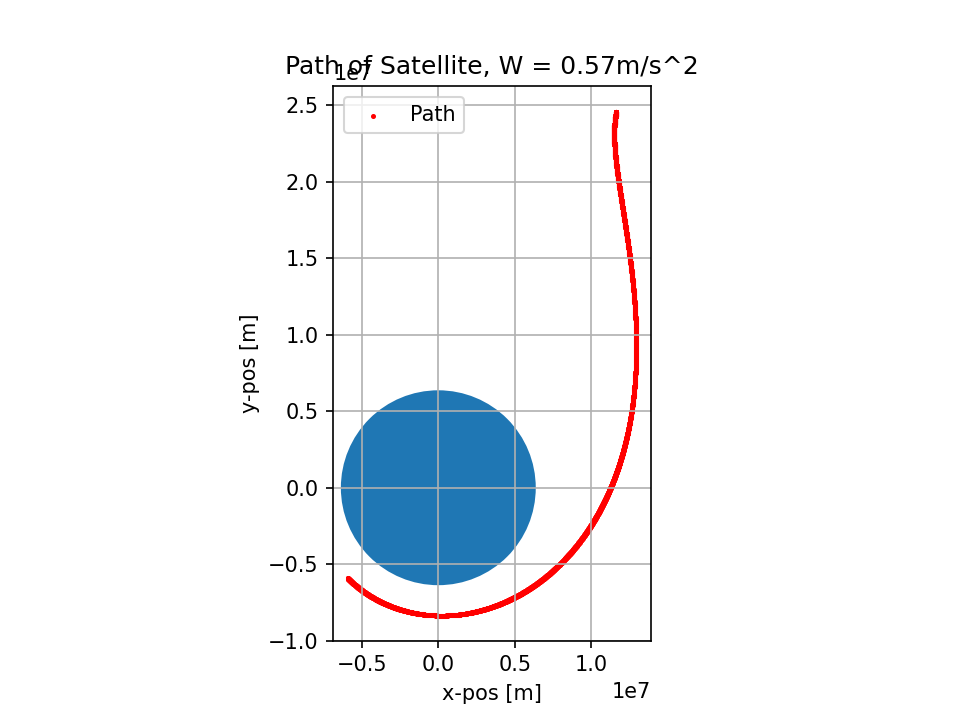

In [69]:
plt.figure()
###Setting aspect ratio to 1 and adding in a circle for Earth###
#plt.xlim(-1.5e7, 1.5e7)
#plt.ylim(-1.5e7, 1.5e7)
ax = plt.gca()
ax.set_aspect(1.0)
draw_circle = plt.Circle((0, 0), r_e)

plt.title("Path of Satellite, W = "+str(np.around(W, 2))+"m/s^2")
plt.xlabel("x-pos [m]")
plt.ylabel("y-pos [m]")
plt.scatter(xarr, yarr, s=2, color = "red", label = "Path")
ax.add_artist(draw_circle)


plt.grid()
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


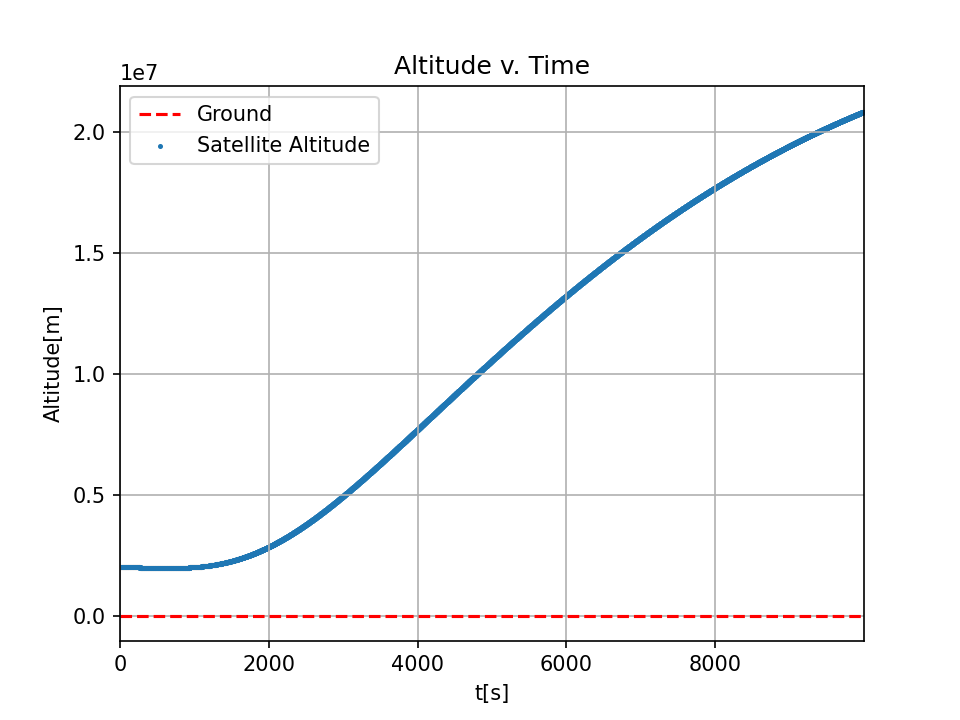

In [70]:
plt.figure()
found = np.where(rarr != 0)
plt.title("Altitude v. Time")
plt.xlabel("t[s]")
plt.ylabel("Altitude[m]")
plt.xlim(0,max(tarr[found]))
#plt.ylim(-5e4, 5e6)
plt.scatter(tarr[found], (rarr[found]-r_e), s = 2, label = "Satellite Altitude")
plt.axhline(0, linestyle = "--", color = "red", label = "Ground")
plt.grid()
plt.legend()

<IPython.core.display.Javascript object>


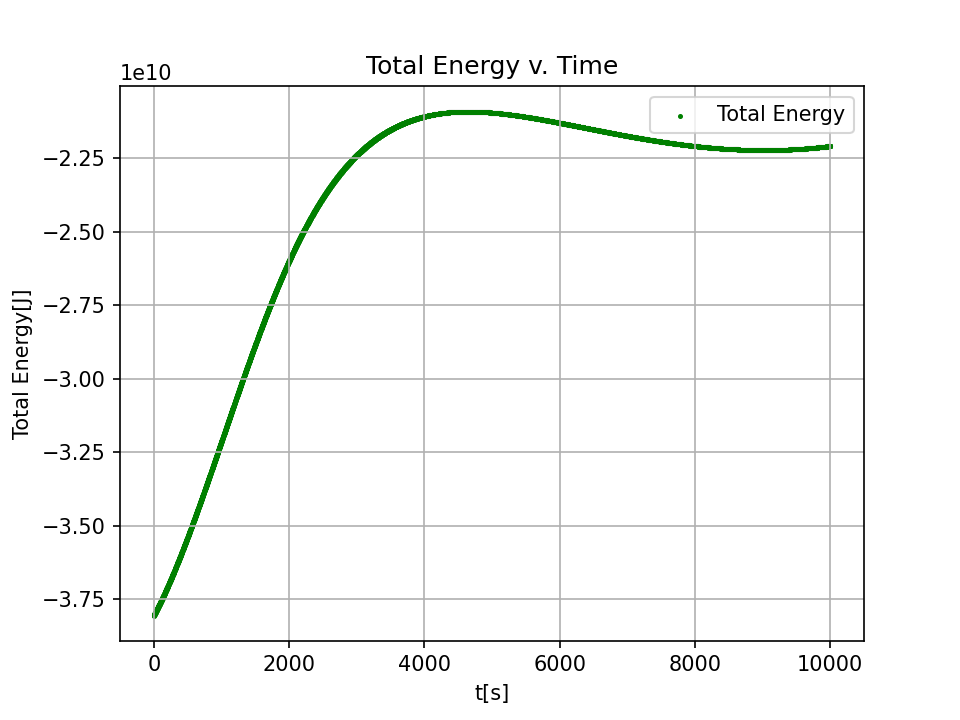

In [71]:
vr = vtotarr*np.cos(thetaarr)
vt = vtotarr*np.sin(thetaarr)
ke = .5*m*(vt**2 + vr**2)

found = np.where(rarr != 0)

ke = .5*m*(vt[found]**2 + vr[found]**2)
pe = -(G*M*m)/rarr[found]
plt.figure()
plt.title("Total Energy v. Time")
#plt.ylim(-4e10, -3.2e10)
plt.scatter(tarr[found], ke+pe, s = 2, color = "green", label = "Total Energy")
plt.xlabel("t[s]")
plt.ylabel("Total Energy[J]")
plt.grid()
plt.legend()

## Citations and Acknowledgements

- Aaron Titus, Professor of Physics, High Point University
- *An Introduction to Computer Simulation Methods Third Edition, Wolfgang Christian* https://www.compadre.org/osp/items/detail.cfm?ID=7375
- https://www.mso.anu.edu.au/~pfrancis/roleplay/MysteryPlanet/Orbits/index.htm